# EDX EDA

    In this notebook, we looked through the data provided from EDX,
    and we did transformations, extractions, cleaning, for a previous analysis of the data,
    in which we were able to extract information for a report in power bi

# 1 Importing needed libraries

In [89]:
# IMPORTAMOS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
import re
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud
from langdetect import detect


# 2 Loading the data from the csv file

In [90]:
df_edx = pd.read_csv(r'EDX\edx_courses.csv')

# 3 Looking the structure of my data

In [91]:
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

# 4 Deleting unused columns

In [93]:
df_edx = df_edx.drop(['summary','course_type','institution','instructors','subtitles',
                    'course_description','course_syllabus','course_url'], axis= 1)

# 5 Finding duplicates in our data

In [94]:
df_edx.duplicated().sum()


1

# 6 Deleting the duplicated values

In [95]:
df_edx = df_edx.drop_duplicates()

# Reseting Indexes in our dataframe

In [96]:
df_edx = df_edx.reset_index(drop=True)

# 7 Looking if we have null data

In [97]:
df_edx.isnull().sum()

title              0
n_enrolled       120
Level              0
subject            0
language           0
course_effort      0
course_length      0
price              0
dtype: int64

# 8 Fixing the values of price column

In [98]:
def extract_numeric_value(value):

    result = re.findall(r'\d+\.?\d*', value)

    return float(result[0]) if result else None

df_edx['prices'] = df_edx['price'].apply(extract_numeric_value)

In [99]:
df_edx['prices'] = df_edx['prices'].round()

# 9 Displaying a graphic to look quantity of courses per level

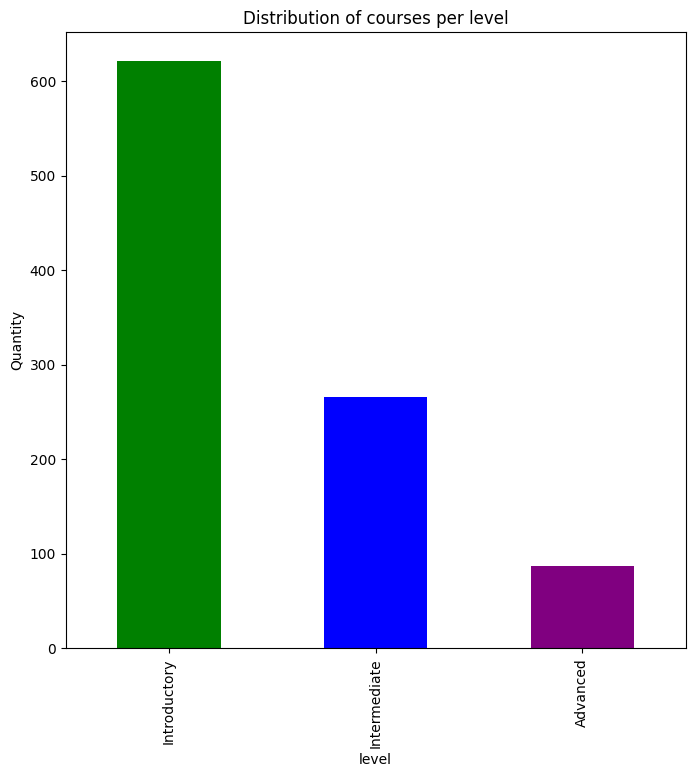

In [100]:
colors = ['Green', 'Blue' , 'Purple']

plt.figure(figsize=(8,8))
df_edx['Level'].value_counts().plot(kind='bar', color= colors)
plt.title('Distribution of courses per level')
plt.xlabel('level')
plt.ylabel('Quantity')
plt.show()

    Conclusion: The courses for Introductory level are most likely to be suscribed to

# 10 Working the subject column to resume it by category

In [101]:
def Categorize_by_subject(subject):
    Education = ['Education & Teacher Training', 'Math', 'Humanities', 'Ethics', 'Biology & Life Sciences', 'Social Sciences', 'Architecture', 'Medicine', 'Environmental Studies', 'Art & Culture', 'Language', 'Philosophy & Ethics', 'History', 'Literature', 'Physics', 'Law', 'Music']
    Science = ['Computer Science', 'Data Analysis & Statistics', 'Chemistry', 'Engineering', 'Electronics', 'Science', 'Energy & Earth Sciences']
    Business = ['Business & Management', 'Economics & Finance', 'Food & Nutrition', 'Design', 'Philanthropy']
    Comunication = ['Communication']
    Health_Safety = ['Health & Safety']
    if subject in Education:
        return 'Education'
    elif subject in Science:
        return 'Science'
    elif subject in Business:
        return 'Business'
    elif subject in Comunication:
        return 'Comunication'
    elif subject in Health_Safety:
        return 'Health & Safety'
    else:
        return 'Others'

# Aplicar la función a cada fila del dataframe
df_edx['category'] = df_edx['subject'].apply(Categorize_by_subject)

# 11 Displaying a graphic to look quantity of courses per category of subject

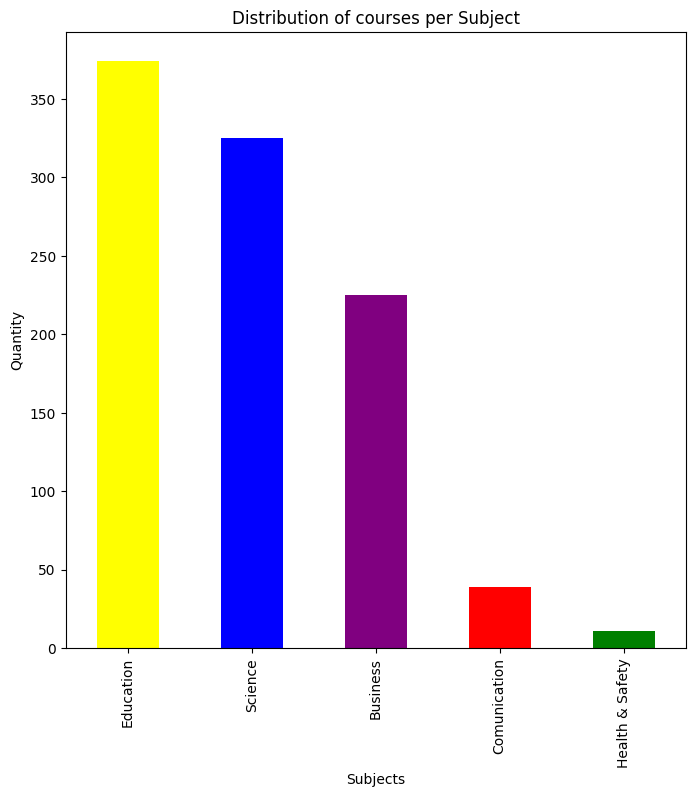

In [102]:
colors = ['yellow', 'Blue' , 'Purple'  ,'Red' , 'Green']

plt.figure(figsize=(8,8))
df_edx['category'].value_counts().plot(kind='bar', color= colors)
plt.title('Distribution of courses per Subject')
plt.xlabel('Subjects')
plt.ylabel('Quantity')
plt.show()

    Conclusion: We can relate that Education and Science are more popular

# 12 Transforming and fixing the n_enrolled column

In [103]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].astype(str)
df_edx['n_enrolled'] = df_edx['n_enrolled'].str.replace(',', '.')
df_edx['n_enrolled'] = df_edx['n_enrolled'].str.replace('.', '')
df_edx['n_enrolled'] = df_edx['n_enrolled'].str.replace('nan', '0')
df_edx['n_enrolled'] = df_edx['n_enrolled'].astype(int)

In [104]:
mean = df_edx[df_edx['n_enrolled'] > 0]['n_enrolled'].mean().round()
df_edx['n_enrolled'] = df_edx['n_enrolled'].replace({0: np.nan}).fillna(mean)

# 13 Extracting the numeric values of course_length and course_effort columns

In [105]:
df_edx['duration_in_weeks'] = df_edx['course_length'].apply(extract_numeric_value)

In [106]:
df_edx['course_effort'] = df_edx['course_effort'].apply(lambda x: x[:-15])
df_edx['course_effort'] = df_edx['course_effort'].apply(lambda x: sum(map(int, x.split('–')))/2)
df_edx['course_effort'] = df_edx['course_effort'].round()

    Creating the duration column in hours

In [107]:
df_edx['course_duration'] = df_edx['course_effort'] * df_edx['duration_in_weeks']

# 14 Finding the relations between numeric columns

In [108]:
df_edx_numeric = df_edx.select_dtypes(include=['int64', 'float64'])

In [109]:
df_edx_numeric.corr()

,n_enrolled,course_effort,prices,duration_in_weeks,course_duration
n_enrolled,1.000000,0.075224,0.044809,0.148455,0.148680
course_effort,0.075224,1.000000,0.310113,0.176382,0.764255
prices,0.044809,0.310113,1.000000,0.145607,0.319145
duration_in_weeks,0.148455,0.176382,0.145607,1.000000,0.682538
course_duration,0.148680,0.764255,0.319145,0.682538,1.000000


# 15 Making a heatmap to visualise the correlation

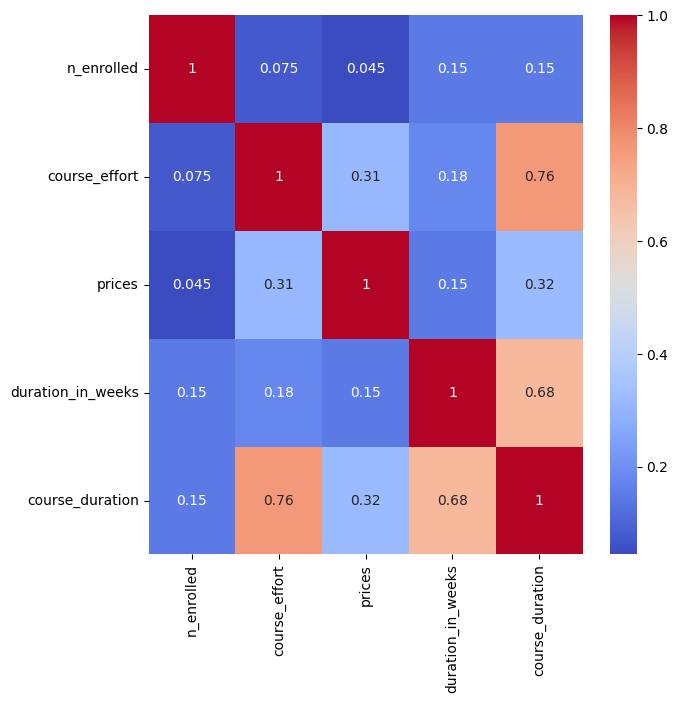

In [110]:
plt.figure(figsize=(7,7))
sns.heatmap(df_edx_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

# 16 Displaying how the courses price are distributed

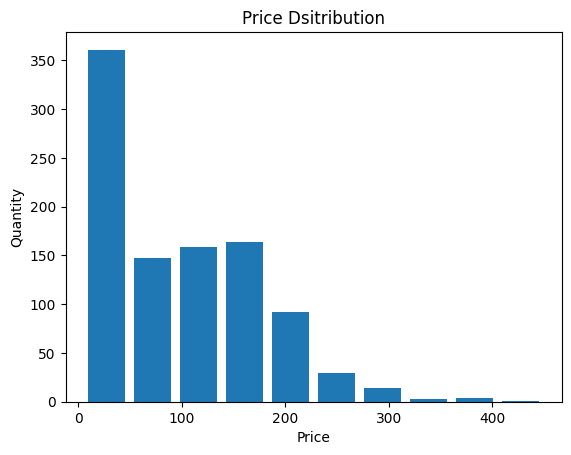

In [111]:
df_edx['prices'].plot(kind='hist', rwidth=0.8)
plt.title('Price Dsitribution')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

    Conclusion: We can look that a third part of the courses are available between 5$ and 25$

# 17 Creating a wordcloud using the courses name

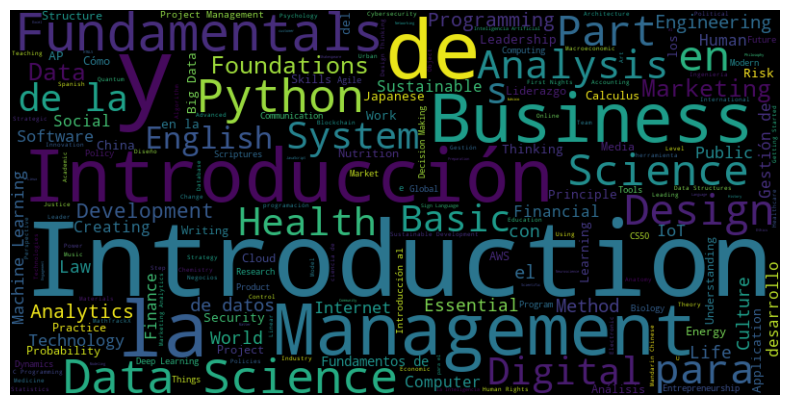

In [112]:
# Joinig all the course titles
titles = ' '.join(df_edx['title'])

# Making a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)

# Showing the wordcloud of course titles
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 18 Creating a dictionary to set up the language column in a better way

In [113]:
language_dict = {'Español': 'Spanish', 'Italiano': 'Italian', '日本語': 'Japanese',
                    'Français': 'French', '中文': 'Chinese', 'Português': 'Portuguese',
                    'اللغة العربية': 'Arabic', 'Deutsch': 'German'}

# 19 Using the dictionary created in step before , to get the language column as we want it

In [114]:
df_edx['language'] = df_edx['language'].replace(language_dict)

# 20 Looking all the values in all the columns to be sure if they are in the way we need them

In [115]:
print("Duplicated Values in the EDX Data: " + str(df_edx.duplicated().sum()))
print("\n")

for i in range(len(df_edx.columns)):
    print("Column: " + str(df_edx.columns[i]) + " , " + " Quantity of values: " +str(df_edx[df_edx.columns[i]].count()) + " , " + " Quantity of empty values: " +str(df_edx[df_edx.columns[i]].isnull().sum()))
    print("\t")

Duplicated Values in the EDX Data: 0


Column: title ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: n_enrolled ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: Level ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: subject ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: language ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: course_effort ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: course_length ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: price ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: prices ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: category ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: duration_in_weeks ,  Quantity of values: 974 ,  Quantity of empty values: 0
	
Column: course_duration ,  Quantity of values: 974 ,  Quantity of empty values: 0
	


In [116]:
df_edx.describe()

,n_enrolled,course_effort,prices,duration_in_weeks,course_duration
count,9.740000e+02,974.000000,974.000000,974.000000,974.000000
mean,5.320882e+04,4.902464,100.468172,6.702259,34.411704
std,1.115057e+05,2.799892,69.611331,3.150173,30.814298
min,5.001000e+03,2.000000,5.000000,1.000000,2.000000
25%,1.268525e+04,3.000000,49.000000,4.000000,16.000000
50%,3.135300e+04,4.000000,79.000000,6.000000,24.000000
75%,5.320900e+04,6.000000,149.000000,8.000000,40.000000
max,2.442271e+06,24.000000,450.000000,18.000000,216.000000


# 21 Deleting 2 old columns , replaced by new ones in a better format

In [118]:
df_edx = df_edx.drop(['price','subject','course_length','duration_in_weeks','course_effort'], axis= 1)

In [119]:
df_edx

,title,n_enrolled,Level,language,prices,category,course_duration
0,How to Learn Online,124980.0,Introductory,English,49.0,Education,4.0
1,Programming for Everybody (Getting Started wit...,293864.0,Introductory,English,49.0,Science,21.0
2,CS50's Introduction to Computer Science,2442271.0,Introductory,English,90.0,Science,144.0
3,The Analytics Edge,129555.0,Intermediate,English,199.0,Science,156.0
4,Marketing Analytics: Marketing Measurement Str...,81140.0,Introductory,English,249.0,Science,24.0
...,...,...,...,...,...,...,...
969,Leaders in Citizen Security and Justice Manage...,53209.0,Intermediate,English,25.0,Education,40.0
970,Pattern Studying and Making | 图案审美与创作,53209.0,Introductory,Chinese,139.0,Education,48.0
971,Computational Neuroscience: Neuronal Dynamics ...,11246.0,Advanced,English,139.0,Education,30.0
972,Cities and the Challenge of Sustainable Develo...,8775.0,Introductory,English,25.0,Education,2.0


# 22 Creating a new CSV file with the final data

In [120]:
#df_edx.to_csv('EDX_completed.csv', index=False)